In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

Training_url = "/content/drive/MyDrive/cs-training.csv"
training_data = pd.read_csv(Training_url)
print(training_data.describe())
print(training_data.isna().sum())

Remove 1 st column

In [ ]:
training_data = training_data.iloc[:,1:]

Handling Missing Values

In [ ]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values = np.nan,strategy = "mean")
training_data = imp_mean.fit_transform(training_data)
training_data = pd.DataFrame(training_data,columns = ["SeriousDlqin2yrs","RevolvingUtilizationOfUnsecuredLines","age","NumberOfTime30-59DaysPastDueNotWorse","DebtRatio","MonthlyIncome","NumberOfOpenCreditLinesAndLoans",
                                            "NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse","NumberOfDependents"])

Seperating Y_train and X_train

In [ ]:
X_data = training_data.iloc[:,1:]
Y_data = training_data.iloc[:,0]

Check for outliers

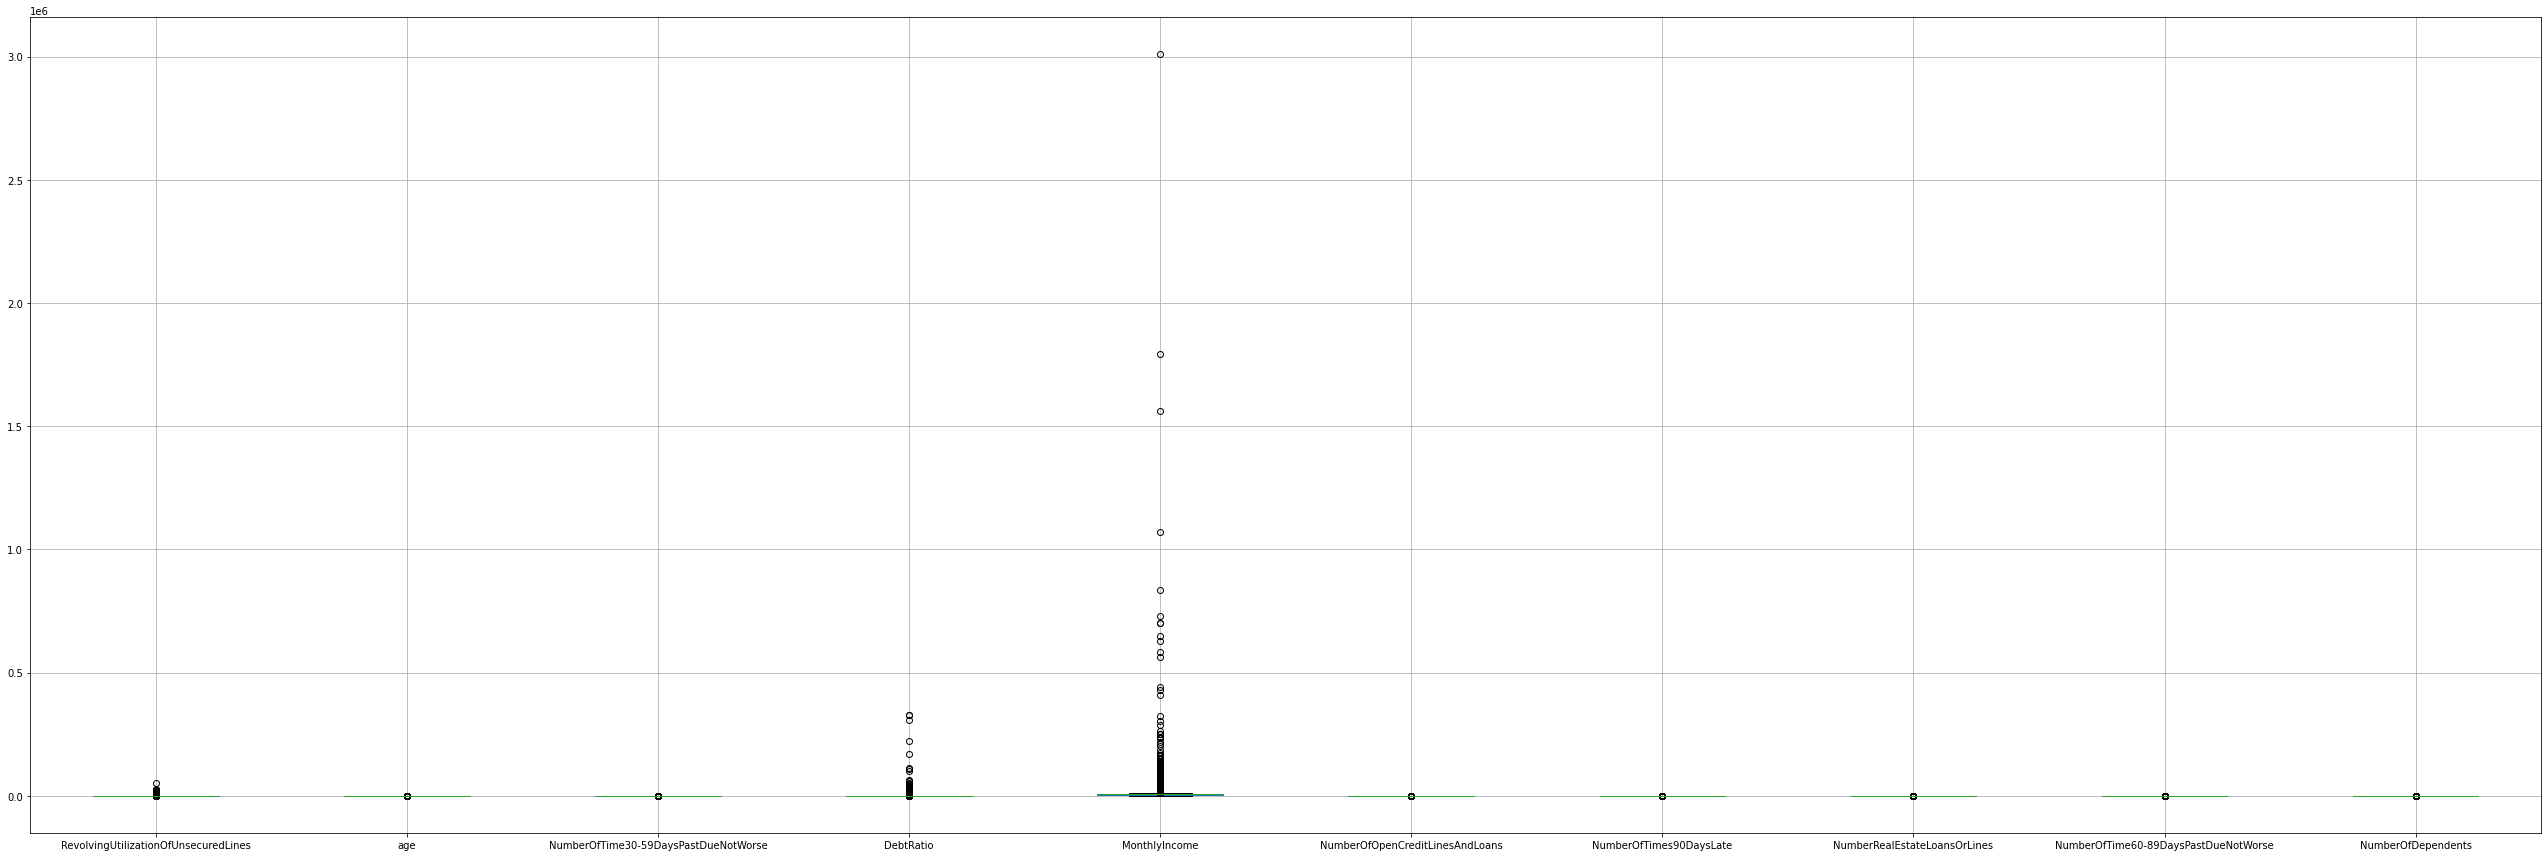

In [ ]:
X_data.boxplot(figsize=(45,15))

Fixing outliers

In [ ]:
sc = StandardScaler()
X_data = sc.fit_transform(X_data)
X_data = pd.DataFrame(X_data,columns = ["RevolvingUtilizationOfUnsecuredLines","age","NumberOfTime30-59DaysPastDueNotWorse","DebtRatio","MonthlyIncome","NumberOfOpenCreditLinesAndLoans",
                                            "NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse","NumberOfDependents"])

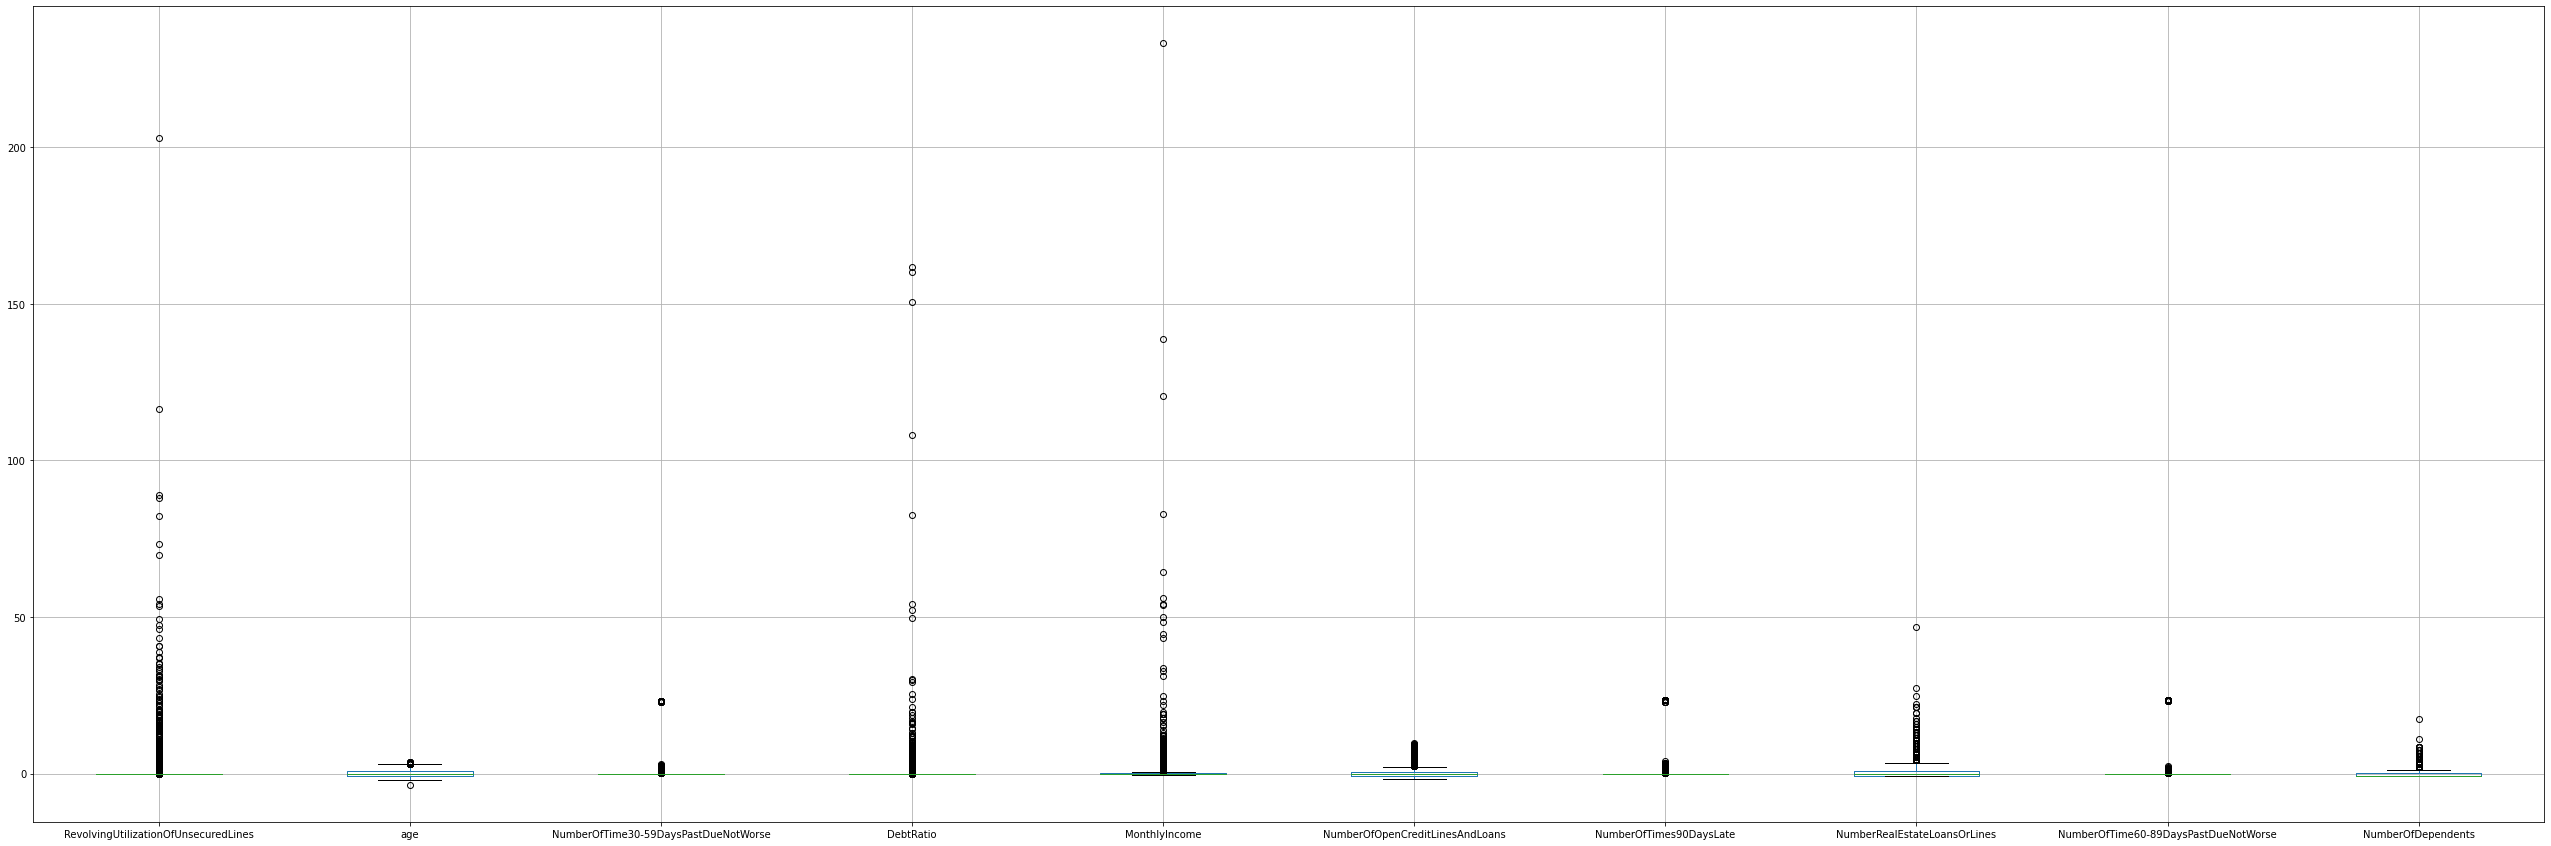

In [ ]:
X_data.boxplot(figsize=(45,15))

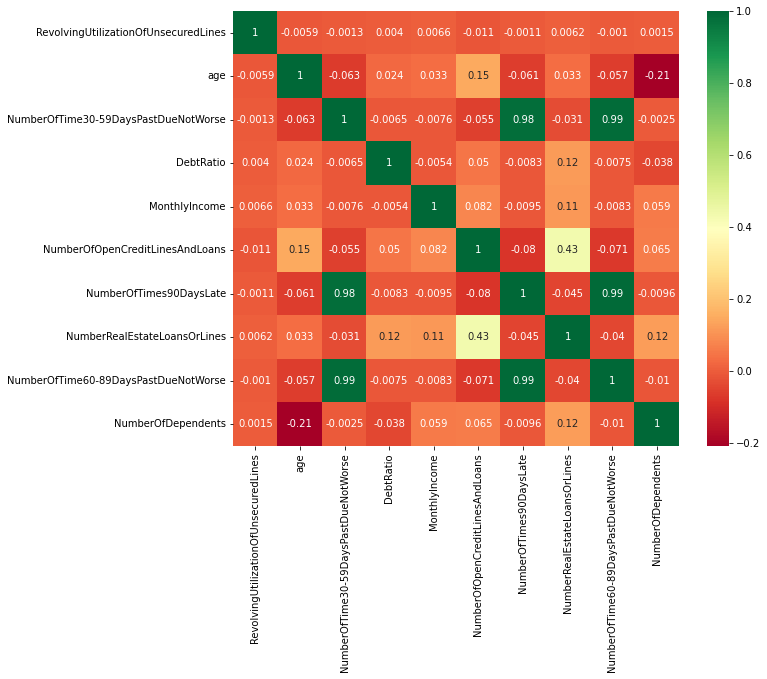

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(X_data.corr(),cmap='RdYlGn',annot = True,annot_kws={'size': 10},ax = ax)

In [ ]:
sns.pairplot(data = X_data)

2 features have high correlation

In [ ]:
new_data_X = X_data.drop(columns = ["NumberOfTime30-59DaysPastDueNotWorse","NumberOfTimes90DaysLate"],axis = 1)

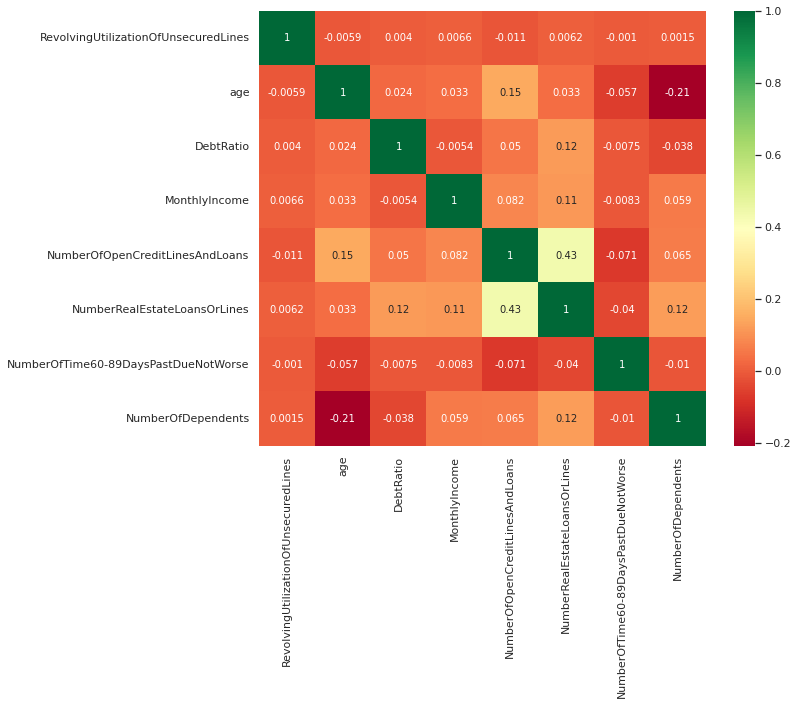

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(new_data_X.corr(),cmap='RdYlGn',annot = True,annot_kws={'size': 10},ax = ax)

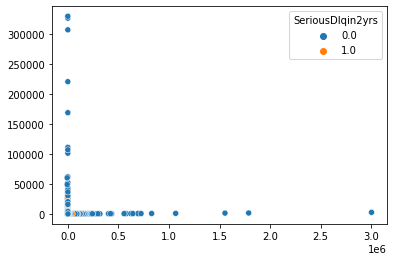

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X_data)
sns.scatterplot(x = X[:,0],y = X[:,1],hue = Y_data)